## ⏩Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## [Debugging in Google Colab link](https://www.geeksforgeeks.org/debugging-in-google-colab/)

In [ ]:
!pip install ipdb
%pdb on
# %pdb off

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00
Automatic pdb calling has been turned ON


#Phase 1: Benchmarker Software Module

## ⏩ BENCHMARKER FOR CNN

https://poloclub.github.io/cnn-explainer/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, LSTM
from itertools import product
import time
import random
import csv
csv_filename = '/content/drive/MyDrive/Colab Notebooks/cnn_benchmark_results/test_results.csv'
np.random.seed(100)
# DataFrame to store results
cnn_results = []

datasets = [
    ('CIFAR-10', tf.keras.datasets.cifar10.load_data()),
    ('CIFAR-100', tf.keras.datasets.cifar100.load_data()),
]

# Clear the contents of the CSV file
with open(csv_filename, mode='w', newline='') as file:
    pass  # Open and close the file to clear its contents
    writer = csv.writer(file)
    writer.writerow(['Dataset', 'Model', 'Num Conv Layers', 'Num Dense Layers', 'Num Pooling Layers', 'Neurons per Layer', 'Batch Size', 'Num Epochs', 'Accuracy', 'Training Time'])
# Configuration Parameter Ranges - corrected the range definitions to not be tuples
# Number_of_Conv_Layers = range(4, 16, 4)
# Number_of_Dense_Layers = range(2, 8, 2)
# Number_of_Pooling_Layers = range(2, 4, 2)
# Number_of_LSTM_Layers = range(4, 16, 4)
# Number_of_Neurons_per_Layer = range(32, 256, 32)
# Number_of_Epochs = range(16, 128, 16)
# Number_of_Batches = range(2, 16, 2)

# Configuration Parameter Ranges
Number_of_Conv_Layers = range(4, 9, 4)
              #  range(1, 3, 1)
Number_of_Dense_Layers = range(2, 5, 2)
                #  range(1, 3, 1)
Number_of_Pooling_Layers = range(2, 5, 2)
#Number_of_LSTM_Layers = range(1, 3, 1)
Number_of_Neurons_per_Layer = range(32, 66, 32)
Number_of_Epochs = range(16,33, 16)
              # range(1, 3, 1)
Number_of_Batches = range(2, 9, 2)
              # range(16, 33, 16)

def Cnn_Benchmarker(num_conv_layers, num_dense_layers, neurons_per_layer, num_classes):
    model = Sequential() #Δημιουργεί ένα νέο κενό μοντέλο το οποίο θα είναι σειριακό, δηλαδή τα επίπεδα θα προστίθενται με τη σειρά που ορίζονται.
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# # DataFrame to store results
# cnn_results = []

# datasets = [
#     ('CIFAR-10', tf.keras.datasets.cifar10.load_data()),
#     ('CIFAR-100', tf.keras.datasets.cifar100.load_data()),
# ]

for dataset_name, ((train_images, train_labels), (test_images, test_labels)) in datasets:
    num_classes = len(np.unique(train_labels))
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # train_images, _, train_labels, _ = train_test_split(train_images, train_labels, train_size=0.4, random_state=42)
    # test_images, _, test_labels, _ = train_test_split(test_images, test_labels, test_size=0.4, random_state=42)






    for params in product(Number_of_Conv_Layers, Number_of_Dense_Layers, Number_of_Pooling_Layers, Number_of_Neurons_per_Layer, Number_of_Batches, Number_of_Epochs):
            num_conv_layers, num_dense_layers, num_of_pooling, neurons_per_layer, batch_size, num_epochs = params

            print(f"Training model on {dataset_name} with {num_conv_layers} conv layers, {num_dense_layers} dense layers, {num_of_pooling} pooling layers, {neurons_per_layer} neurons per layer, {batch_size} batch size, {num_epochs} epoch size")
            model = Cnn_Benchmarker(num_conv_layers, num_dense_layers, neurons_per_layer, num_classes)

            model_name = f"CNN_C{num_conv_layers}_D{num_dense_layers}_P{num_of_pooling}_N{neurons_per_layer}_B{batch_size}_Ε{num_epochs}"
            start_time = time.time()
            history = model.fit(train_images, train_labels, epochs = num_epochs, batch_size = batch_size)
            end_time = time.time()
            test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
            time_score = end_time - start_time
            cnn_results.append((dataset_name, model_name, num_conv_layers, num_dense_layers, num_of_pooling, neurons_per_layer, batch_size, num_epochs, test_acc, time_score))
            with open(csv_filename, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([dataset_name, model_name, num_conv_layers, num_dense_layers, num_of_pooling, neurons_per_layer, batch_size, num_epochs, test_acc, time_score])

df_Cnn_results = pd.read_csv(csv_filename)
df_Cnn_results # The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar

Training model on CIFAR-10 with 4 conv layers, 2 dense layers, 2 pooling layers, 32 neurons per layer, 2 batch size, 16 epoch size
Epoch 1/16
25000/25000 [==============================] - 172s 7ms/step - loss: 1.5611 - accuracy: 0.4247
Epoch 2/16
25000/25000 [==============================] - 173s 7ms/step - loss: 1.2483 - accuracy: 0.5553
Epoch 3/16
25000/25000 [==============================] - 175s 7ms/step - loss: 1.1399 - accuracy: 0.5994
Epoch 4/16
 8725/25000 [=========>....................] - ETA: 1:50 - loss: 1.0626 - accuracy: 0.6270

KeyboardInterrupt: 

## ⏩ BENCHMARKER FOR ML

 - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#run-the-benchmark
 - [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 -[KNN](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
 - [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
 - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import time
import random
import csv

csv_filename1 = '/content/drive/MyDrive/Colab Notebooks/ml_bechmark/ml_bechmark.csv'

np.random.seed(100)

# Clear the contents of the CSV file and write headers
with open(csv_filename1, mode='w', newline='') as file:
    pass
    writer = csv.writer(file)
    writer.writerow(['Dataset', 'Model', 'Best CV Score', 'Test Score', 'Training Time'] + ['Param_' + param for param in ['kernel', 'decision_function_shape', 'n_neighbors', 'p', 'penalty', 'solver', 'multi_class', 'criterion', 'splitter']])

def ml_benchmarker(clf, params, name, dataset_name):
    print("_" * 80)
    print("Grid Search for:", name)
    grid_search = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=2, verbose=1)

    t0 = time.time()
    grid_search.fit(train_images, train_labels)
    training_time = time.time() - t0

    print(f"done in: {training_time}")
    print(f"Best score: {grid_search.best_score_}")
    print(f"Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

    # Evaluate model on test data
    test_score = grid_search.score(test_images, test_labels)
    print(f"Test score: {test_score}")

    best_parameters = {param: best_parameters[param] for param in params.keys()}

    # Create a row with results and parameters
    row = [dataset_name, name, grid_search.best_score_, test_score, training_time] + [best_parameters.get(param, None) for param in ['kernel', 'decision_function_shape', 'n_neighbors', 'p', 'penalty', 'solver', 'multi_class', 'criterion', 'splitter']]

    # Save results to CSV
    with open(csv_filename1, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(row)

    return dataset_name, name, grid_search.best_score_, test_score, training_time, best_parameters

results = []

datasets = [
    ('CIFAR-10', tf.keras.datasets.cifar10.load_data()),
    ('CIFAR-100', tf.keras.datasets.cifar100.load_data()),
]

for dataset_name, ((train_images, train_labels), (test_images, test_labels)) in datasets:
    print(f"Processing dataset: {dataset_name}")

    # Reshape the data to 1D arrays
    train_images = train_images.reshape(train_images.shape[0], -1)
    test_images = test_images.reshape(test_images.shape[0], -1)
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    train_images, _, train_labels, _ = train_test_split(train_images, train_labels, train_size=0.05, random_state=42)
    test_images, _, test_labels, _ = train_test_split(test_images, test_labels, test_size=0.05, random_state=42)

    # SVM configurations (reduced parameter grid)
    svm_params = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'decision_function_shape': ['ovo', 'ovr']
    }
    results.append(ml_benchmarker(SVC(), svm_params, "SVM", dataset_name))

    # KNN configurations (reduced parameter grid)
    knn_params = {
        'n_neighbors': list(range(2, 9, 2)),
        'p': [1, 2, random.random()]
    }
    results.append(ml_benchmarker(KNeighborsClassifier(), knn_params, "KNN", dataset_name))

    # Logistic Regression configurations (reduced parameter grid)
    log_reg_params = {
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'multi_class': ['auto', 'ovr']
    }
    results.append(ml_benchmarker(LogisticRegression(max_iter=1000), log_reg_params, "Logistic Regression", dataset_name))

    # Decision Tree configurations (reduced parameter grid)
    dt_params = {
        'criterion': ["gini", "entropy", "log_loss"],
        'splitter': ["best", "random"]
    }
    results.append(ml_benchmarker(DecisionTreeClassifier(), dt_params, "Decision Tree", dataset_name))


# Convert the results list to a pandas DataFrame containing the dataset name, model, best score, test score, and test time
# ml_benchmark = pd.DataFrame(results, columns=['Dataset', 'Model', 'Best CV Score', 'Test Score', 'Training Time', 'Best Parameters'])
# best_params_df = ml_benchmark['Best Parameters'].apply(pd.Series)
# ml_benchmark = pd.concat([ml_benchmark.drop(columns=['Best Parameters']), best_params_df], axis=1)
# print(ml_benchmark)
ml_benchmark = pd.read_csv(csv_filename1)
ml_benchmark

169001437/169001437 [==============================] - 12s 0us/step
Processing dataset: CIFAR-10
________________________________________________________________________________
Grid Search for: SVM
Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


done in: 34.63389468193054
Best score: 0.3716
Best parameters set:
	decision_function_shape: 'ovo'
	kernel: 'rbf'
Test score: 0.4070526315789474
________________________________________________________________________________
Grid Search for: KNN
Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.2224 0.208     nan 0.2692 0.2416    nan 0.2528 0.2372    nan 0.2512
 0.2404    nan]
  warnings.warn(


done in: 11.730693817138672
Best score: 0.2692
Best parameters set:
	n_neighbors: 4
	p: 1
Test score: 0.2748421052631579
________________________________________________________________________________
Grid Search for: Logistic Regression
Fitting 2 folds for each of 4 candidates, totalling 8 fits
done in: 40.12262177467346
Best score: 0.29800000000000004
Best parameters set:
	multi_class: 'auto'
	penalty: 'l1'
	solver: 'liblinear'
Test score: 0.3231578947368421
________________________________________________________________________________
Grid Search for: Decision Tree
Fitting 2 folds for each of 6 candidates, totalling 12 fits
done in: 19.8522469997406
Best score: 0.22039999999999998
Best parameters set:
	criterion: 'log_loss'
	splitter: 'best'
Test score: 0.22105263157894736
Processing dataset: CIFAR-100
________________________________________________________________________________
Grid Search for: SVM
Fitting 2 folds for each of 8 candidates, totalling 16 fits
done in: 36.165760

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.0736 0.0644    nan 0.0648 0.06      nan 0.0664 0.0632    nan 0.0668
 0.0592    nan]
  warnings.warn(


done in: 11.531799793243408
Best score: 0.0736
Best parameters set:
	n_neighbors: 2
	p: 1
Test score: 0.08473684210526315
________________________________________________________________________________
Grid Search for: Logistic Regression
Fitting 2 folds for each of 4 candidates, totalling 8 fits
done in: 210.31802034378052
Best score: 0.1024
Best parameters set:
	multi_class: 'ovr'
	penalty: 'l1'
	solver: 'liblinear'
Test score: 0.1051578947368421
________________________________________________________________________________
Grid Search for: Decision Tree
Fitting 2 folds for each of 6 candidates, totalling 12 fits
done in: 34.3702609539032
Best score: 0.042800000000000005
Best parameters set:
	criterion: 'gini'
	splitter: 'random'
Test score: 0.04536842105263158


,Dataset,Model,Best CV Score,Test Score,Training Time,Param_kernel,Param_decision_function_shape,Param_n_neighbors,Param_p,Param_penalty,Param_solver,Param_multi_class,Param_criterion,Param_splitter
0,CIFAR-10,SVM,0.3716,0.407053,34.633895,rbf,ovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIFAR-10,KNN,0.2692,0.274842,11.730694,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN
2,CIFAR-10,Logistic Regression,0.2980,0.323158,40.122622,NaN,NaN,NaN,NaN,l1,liblinear,auto,NaN,NaN
3,CIFAR-10,Decision Tree,0.2204,0.221053,19.852247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,best
4,CIFAR-100,SVM,0.1160,0.121263,36.165761,linear,ovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CIFAR-100,KNN,0.0736,0.084737,11.531800,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
6,CIFAR-100,Logistic Regression,0.1024,0.105158,210.318020,NaN,NaN,NaN,NaN,l1,liblinear,ovr,NaN,NaN
7,CIFAR-100,Decision Tree,0.0428,0.045368,34.370261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,random


In [ ]:
import pandas as pd
ml_benchmark= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml_bechmark/ml_bechmark.csv')
ml_benchmark

,Dataset,Model,Best CV Score,Test Score,Training Time,Param_kernel,Param_decision_function_shape,Param_n_neighbors,Param_p,Param_penalty,Param_solver,Param_multi_class,Param_criterion,Param_splitter
0,CIFAR-10,SVM,0.3716,0.407053,34.633895,rbf,ovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIFAR-10,KNN,0.2692,0.274842,11.730694,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN
2,CIFAR-10,Logistic Regression,0.2980,0.323158,40.122622,NaN,NaN,NaN,NaN,l1,liblinear,auto,NaN,NaN
3,CIFAR-10,Decision Tree,0.2204,0.221053,19.852247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,best
4,CIFAR-100,SVM,0.1160,0.121263,36.165761,linear,ovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CIFAR-100,KNN,0.0736,0.084737,11.531800,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
6,CIFAR-100,Logistic Regression,0.1024,0.105158,210.318020,NaN,NaN,NaN,NaN,l1,liblinear,ovr,NaN,NaN
7,CIFAR-100,Decision Tree,0.0428,0.045368,34.370261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,random


In [ ]:
ml_benchmark = ml_benchmark.fillna('N')
ml_benchmark

,Dataset,Model,Best CV Score,Test Score,Training Time,kernel,decision_function_shape,n_neighbors,p,penalty,solver,multi_class,criterion,splitter
0,CIFAR-10,SVM,0.353061,0.4000,73.320725,rbf,ovo,N,N,N,N,N,N,N
1,CIFAR-10,KNN,0.241072,0.2768,36.027940,N,N,6.0,1.0,N,N,N,N,N
2,CIFAR-10,Logistic Regression,0.297069,0.3120,86.733772,N,N,N,N,l1,liblinear,ovr,N,N
3,CIFAR-10,Decision Tree,0.216528,0.2064,29.447757,N,N,N,N,N,N,N,gini,random
4,CIFAR-100,SVM,0.099201,0.1152,76.753322,linear,ovo,N,N,N,N,N,N,N
5,CIFAR-100,KNN,0.066134,0.1008,32.739553,N,N,8.0,1.0,N,N,N,N,N
6,CIFAR-100,Logistic Regression,0.085325,0.1168,504.612907,N,N,N,N,l1,liblinear,auto,N,N
7,CIFAR-100,Decision Tree,0.034668,0.0352,141.496958,N,N,N,N,N,N,N,gini,best


#Phase 2: Benchmark Statistics Collector and Benchmark Visualizer

In [ ]:
# import pandas as pd
# ml_benchmark= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml_bechmark/ml_bechmark.csv')
# ml_benchmark

In [ ]:
# import pandas as pd
# df_Cnn_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cnn_benchmark_results/cnn_benchmark_results.csv')
# df_Cnn_results

## ⏩ Statistic Collector

In [ ]:
import pandas as pd

#I choose the columns that are important to me.
df_Cnn_models = df_Cnn_results[['Dataset', 'Model', 'Accuracy', 'Training Time']] # Verify that 'Validation Accuracy' and 'Training Time' are the correct column names in df_Cnn_results

# Ι change the name for each  column.
df_Cnn_models.rename(columns={' Accuracy': 'Accuracy', 'Training Time': 'Time'}, inplace=True)# inplace = True σημαίνει πως η αντικατάσταση θα γίνει κατεθείαν στο αρχικό df

#I choose the columns that are important to me.
df_ml_models = ml_benchmark[['Dataset','Model', 'Best CV Score', 'Training Time']]

# Ι change the name for each  column such that fit to the columns from the df_Cnn_models.
df_ml_models.rename(columns={'Best CV Score': 'Accuracy', 'Training Time': 'Time'}, inplace=True)

# I combine the two dfs.
df_combined = pd.concat([df_ml_models, df_Cnn_models], ignore_index=True)# ignore_index=True σημαίνει πως θα δημιουργήσει μια νεά αρίθμηση στα δεδομένα
df_combined

<ipython-input-13-e020bc36d29d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cnn_models.rename(columns={' Accuracy': 'Accuracy', 'Training Time': 'Time'}, inplace=True)# inplace = True σημαίνει πως η αντικατάσταση θα γίνει κατεθείαν στο αρχικό df
<ipython-input-13-e020bc36d29d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_models.rename(columns={'Best CV Score': 'Accuracy', 'Training Time': 'Time'}, inplace=True)


,Dataset,Model,Accuracy,Time
0,CIFAR-10,SVM,0.51024,13342.433637
1,CIFAR-10,KNN,0.34776,3765.532550
2,CIFAR-10,Logistic Regression,0.38166,5209.263706
3,CIFAR-10,Decision Tree,0.25536,348.254473
4,CIFAR-100,SVM,0.22600,12900.497821
...,...,...,...,...
288,CIFAR-100,CNN_C4_D2_P4_N64_B16_Ε48,0.32460,506.913494
289,CIFAR-100,CNN_C4_D2_P4_N64_B16_Ε64,0.33140,673.473880
290,CIFAR-100,CNN_C4_D2_P4_N128_B4_Ε16,0.27930,649.433082
291,CIFAR-100,CNN_C4_D2_P4_N128_B4_Ε32,0.29170,1299.069801


In [ ]:
# Sort the dataframe by 'Accuracy' in descending order
df_combined = df_combined.sort_values(by='Accuracy', ascending=False)
df_combined

,Dataset,Model,Accuracy,Time
204,CIFAR-10,CNN_C4_D2_P4_N128_B16_Ε16,0.71600,171.339293
68,CIFAR-10,CNN_C6_D2_P2_N64_B12_Ε16,0.71180,247.269398
184,CIFAR-10,CNN_C4_D2_P4_N64_B12_Ε16,0.71080,238.846426
11,CIFAR-10,CNN_C2_D2_P2_N64_B8_Ε16,0.71050,327.175633
188,CIFAR-10,CNN_C4_D2_P4_N64_B16_Ε16,0.70680,173.261917
...,...,...,...,...
228,CIFAR-100,CNN_C4_D2_P2_N128_B4_Ε48,0.23040,1920.725587
4,CIFAR-100,SVM,0.22600,12900.497821
6,CIFAR-100,Logistic Regression,0.15268,15595.287398
5,CIFAR-100,KNN,0.15036,3692.216705


## ⏩ ALL DATA POINTS

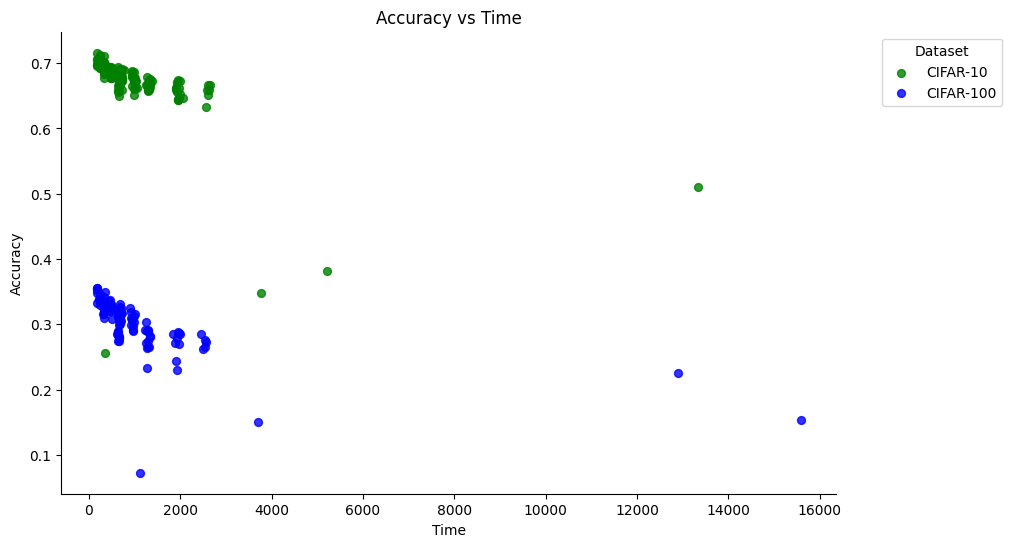

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))


colors = {'CIFAR-10': 'green', 'CIFAR-100': 'blue'}
for dataset in df_combined['Dataset'].unique():
    subset = df_combined[df_combined['Dataset'] == dataset]
    plt.scatter(subset['Time'], subset['Accuracy'], s=32, alpha=0.8, label=dataset, color=colors[dataset])


# for i, row in df_combined.iterrows():
#     plt.annotate(row['Model'], (row['Time'], row['Accuracy']), textcoords="offset points", xytext=(5, 5), ha='center')


plt.gca().spines[['top', 'right']].set_visible(False)

#Labels
plt.title('Accuracy vs Time')
plt.xlabel('Time')
plt.ylabel('Accuracy')

plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- link and explanation

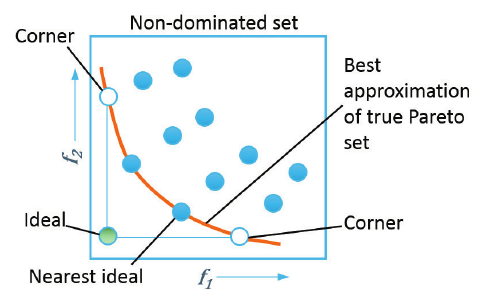


[ Link: Multiobjective Optimization of Fuzzy System for Cardiovascular Risk Classification](https://www.mdpi.com/2079-3197/11/7/147)

## ⏩Non Dominated points for the cifar10

 - Note: the (from pygmo import non_dominated_front_2d) find the points with the smallest values both of the axes. I want to find the points which have small time (x - axes) and big accuracy (y - axes).So I change the accuracy from positive to negative because i don't want to change the  (from pygmo import non_dominated_front_2d) in this way i will find the points with small training time and big accuracy


[the link for  the NON DOMINATED POINTS](https://esa.github.io/pygmo2/mo_utils.html)

In [ ]:
!pip install pygmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 34.5 MB/s eta 0:00:00


<ipython-input-17-3779489e156c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['Accuracy']] = - subset[['Accuracy']]


No Dominant points based on Accuracy and Time for CIFAR-10:
Accuracy: -0.7160000205039978, Time: 171.33929300308228, Model: CNN_C4_D2_P4_N128_B16_Ε16, Dataset: CIFAR-10
Accuracy: -0.6991000175476074, Time: 170.92561221122742, Model: CNN_C4_D2_P2_N192_B16_Ε16, Dataset: CIFAR-10
Accuracy: -0.6970000267028809, Time: 170.4194655418396, Model: CNN_C4_D2_P2_N128_B16_Ε16, Dataset: CIFAR-10


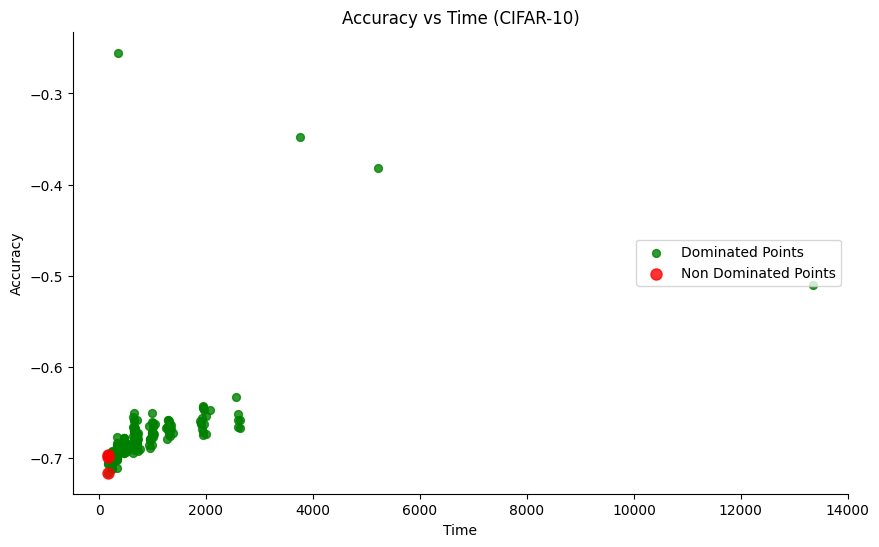

In [ ]:
import matplotlib.pyplot as plt
from pygmo import non_dominated_front_2d

subset = df_combined[df_combined['Dataset'] == 'CIFAR-10']
# The non_dominated_front_2d takes the smallest training time and the smallest accuracy as the best  combination
# I want to take the smallest training and the bigest accuracy as the best combination
# For this reason I switch the accuracy from positive to negative
subset[['Accuracy']] = - subset[['Accuracy']]

#######################   Non dominated data points ###########################

# Take the values for the non dominated points
non_dominated_indices_for_cifar_10 = non_dominated_front_2d(subset[['Accuracy', 'Time']].values)


print("No Dominant points based on Accuracy and Time for CIFAR-10:")


Accuracy = []
Time = []
Model = []
Dataset = []

# Loop through the non dominated points and print their values
for index in non_dominated_indices_for_cifar_10:

        accuracy = subset['Accuracy'].iloc[index]  # Get accuracy at the index
        time = subset['Time'].iloc[index]  # Get time at the index
        model = subset['Model'].iloc[index]  # Get model name at the index
        dataset = subset['Dataset'].iloc[index]  # Get dataset name at the index
        print(f"Accuracy: {accuracy}, Time: {time}, Model: {model}, Dataset: {dataset}")
        Accuracy.append(accuracy)
        Time.append(time)
        Model.append(model)
        Dataset.append(dataset)


# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(subset['Time'], subset['Accuracy'], s=32, alpha=0.8, label='Dominated Points', color='green')

#Data points (I print the dominated and non dominated points for cifar10)
no_dominate_points_for_cifar_10 = subset.iloc[non_dominated_indices_for_cifar_10]
plt.scatter(no_dominate_points_for_cifar_10['Time'], no_dominate_points_for_cifar_10['Accuracy'], s=64, alpha=0.8, label='Non Dominated Points', color='red')

#Labels
plt.title('Accuracy vs Time (CIFAR-10)')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.legend(loc = 'center right')

# Delete the top line and the right line
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

Accuracy = pd.DataFrame(Accuracy, columns = ["Accuracy"])
Time = pd.DataFrame(Time, columns = ["Time"])
Model = pd.DataFrame(Model, columns = ["Model"])
Dataset= pd.DataFrame(Dataset, columns = ["Dataset"])

df_non_dominated_for_cifar_10 = pd.concat([Accuracy, Time, Model, Dataset], axis=1)

In [ ]:
# I create a pandas DataFrame with the non_dominated_for_cifar_10 and I change THE Accuracy to positive
df_non_dominated_for_cifar_10[["Accuracy"]] = - df_non_dominated_for_cifar_10[["Accuracy"]]
df_non_dominated_for_cifar_10

,Accuracy,Time,Model,Dataset
0,0.7160,171.339293,CNN_C4_D2_P4_N128_B16_Ε16,CIFAR-10
1,0.6991,170.925612,CNN_C4_D2_P2_N192_B16_Ε16,CIFAR-10
2,0.6970,170.419466,CNN_C4_D2_P2_N128_B16_Ε16,CIFAR-10


## ⏩Non Dominated points for the cifar100

[the link for  the NON DOMINATED POINTS](https://esa.github.io/pygmo2/mo_utils.html)


<ipython-input-19-22dda6b68b37>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['Accuracy']] = - subset[['Accuracy']]


No Dominant points based on Accuracy and Time for CIFAR-100:
Accuracy: -0.3560999929904938, Time: 169.13617300987244, Model: CNN_C4_D2_P4_N64_B16_Ε16, Dataset: CIFAR-100
Accuracy: -0.3551999926567077, Time: 167.1283221244812, Model: CNN_C4_D2_P2_N192_B16_Ε16, Dataset: CIFAR-100
Accuracy: -0.3526000082492828, Time: 165.94935131072998, Model: CNN_C4_D2_P2_N64_B16_Ε16, Dataset: CIFAR-100
Accuracy: -0.3481000065803528, Time: 165.33911442756653, Model: CNN_C4_D2_P2_N128_B16_Ε16, Dataset: CIFAR-100


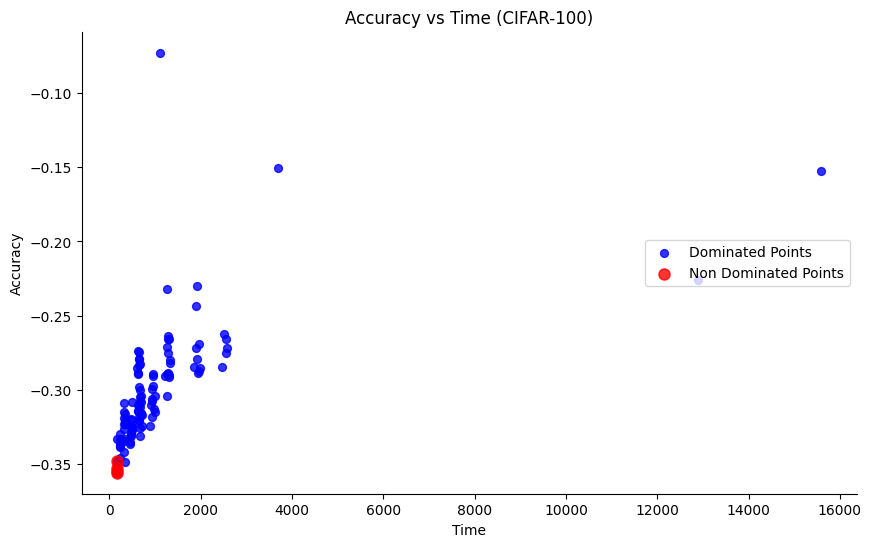

In [ ]:
import matplotlib.pyplot as plt
from pygmo import non_dominated_front_2d

subset = df_combined[df_combined['Dataset'] == 'CIFAR-100']

# The non_dominated_front_2d takes the smallest training time and the smallest accuracy as the best  combination
# I want to take the smallest training and the bigest accuracy as the best combination
# For this reason I switch the accuracy from positive to negative
subset[['Accuracy']] = - subset[['Accuracy']]

#######################   Non dominated data points ###########################


non_dominated_indices_for_cifar_100 = non_dominated_front_2d(subset[['Accuracy', 'Time']].values)
# subset = df_combined[df_combined['Dataset'] == 'CIFAR-100']

Accuracy = []
Time = []
Model = []
Dataset = []

print("No Dominant points based on Accuracy and Time for CIFAR-100:")
for index in non_dominated_indices_for_cifar_100:

        accuracy = subset['Accuracy'].iloc[index]  # Get accuracy at the index
        time = subset['Time'].iloc[index]  # Get time at the index
        model = subset['Model'].iloc[index]  # Get model name at the index
        dataset = subset['Dataset'].iloc[index]  # Get dataset name at the index
        print(f"Accuracy: {accuracy}, Time: {time}, Model: {model}, Dataset: {dataset}")
        Accuracy.append(accuracy)
        Time.append(time)
        Model.append(model)
        Dataset.append(dataset)




# Scatter Plot
plt.figure(figsize=(10, 6))


plt.scatter(subset['Time'], subset['Accuracy'], s=32, alpha=0.8, label='Dominated Points', color='blue')

#Data pints (I print the dominated and non dominated points for cifar10)
no_dominate_points_for_cifar_100 = subset.iloc[non_dominated_indices_for_cifar_100]
plt.scatter(no_dominate_points_for_cifar_100['Time'], no_dominate_points_for_cifar_100['Accuracy'], s=64, alpha=0.8, label='Non Dominated Points', color='red')

# Labels
plt.title('Accuracy vs Time (CIFAR-100)')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.legend(loc='center right')


# Delete the top line and the right line
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


Accuracy = pd.DataFrame(Accuracy, columns = ["Accuracy"])
Time = pd.DataFrame(Time, columns = ["Time"])
Model = pd.DataFrame(Model, columns = ["Model"])
Dataset = pd.DataFrame(Dataset, columns = ["Dataset"])

df_non_dominated_for_cifar_100 = pd.concat([Accuracy, Time, Model, Dataset], axis=1)


In [ ]:
# I create a pandas DataFrame with the non_dominated_for_cifar_100 and I change the Accuracy from negative to positive
df_non_dominated_for_cifar_100[["Accuracy"]] = - df_non_dominated_for_cifar_100[["Accuracy"]]
df_non_dominated_for_cifar_100

,Accuracy,Time,Model,Dataset
0,0.3561,169.136173,CNN_C4_D2_P4_N64_B16_Ε16,CIFAR-100
1,0.3552,167.128322,CNN_C4_D2_P2_N192_B16_Ε16,CIFAR-100
2,0.3526,165.949351,CNN_C4_D2_P2_N64_B16_Ε16,CIFAR-100
3,0.3481,165.339114,CNN_C4_D2_P2_N128_B16_Ε16,CIFAR-100


## ⏩ Selected only the non_dominated points

In [ ]:
df_non_dominated_data_points = pd.concat([df_non_dominated_for_cifar_10, df_non_dominated_for_cifar_100], axis = 0)
df_non_dominated_data_points


,Accuracy,Time,Model,Dataset
0,0.7160,171.339293,CNN_C4_D2_P4_N128_B16_Ε16,CIFAR-10
1,0.6991,170.925612,CNN_C4_D2_P2_N192_B16_Ε16,CIFAR-10
2,0.6970,170.419466,CNN_C4_D2_P2_N128_B16_Ε16,CIFAR-10
0,0.3561,169.136173,CNN_C4_D2_P4_N64_B16_Ε16,CIFAR-100
1,0.3552,167.128322,CNN_C4_D2_P2_N192_B16_Ε16,CIFAR-100
2,0.3526,165.949351,CNN_C4_D2_P2_N64_B16_Ε16,CIFAR-100
3,0.3481,165.339114,CNN_C4_D2_P2_N128_B16_Ε16,CIFAR-100
